In [3]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random as rnd
from sklearn.model_selection import train_test_split, cross_val_score

# Univariate non-linear Transformations #

WE Saw last class that adding polymonial terms can help linear models with regression taks. There are other transformations of features that prove useful in hleping increase model preformance. Some useful transformations include applying funtions like $log$,$exp$,$sin$, and $cos$. Since Tree-based models only care about order and not scale these transformations can be importnat when building linear models or neural nets that are tied to the scale and distibution of the features. We can break these transformations into two categories, relative scaling and periodic patterns. Functions like $log$ and $exp$ can help adjust the relative scale of the data, while functions like $sin$ and $cos$ can help when there are periodic patterns.

Most models will work best when the features are gussian distributed. Therfore, depending on the distribution of the feature in your data a transformation using $log$ and $exp$ can help us obtain the desired distribution. One example of such a feature is an integer count feature. This could be data that comes from a question such as "how often did a user log in?". We will create a syntetic version of this to se how we could tranform this data for modeling:

In [22]:
nd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))
print(X.shape)

Number of feature appearances:
[26 50 48 66 61 57 52 54 31 42 43 36 34 26 25 24 23 18 22 14 15 11 22 13
 11  7 10 10  4  7  6  5  7  4  4  6  7  5  6  2  6  3  5  1  6  3  3  4
  1  1  1  3  1  1  1  1  2  0  2  4  3  1  2  2  1  1  0  2  1  1  1  0
  0  0  0  2  1  1  1  0  0  0  1  1  0  0  0  0  0  0  0  0  0  1  1  0
  0  2  0  0  1  0  1  2  0  0  0  0  0  0  0  0  2  0  1  1  0  0  0  0
  0  0  0  0  0  0  0  0  1  0  1  0  1]
(1000, 3)


Now we can see that the value 3 is the most common with 66 appearances and the bin counds fall quickly after that. We can visualize the counts as follows:

Text(0.5, 1.0, 'Feature 1')

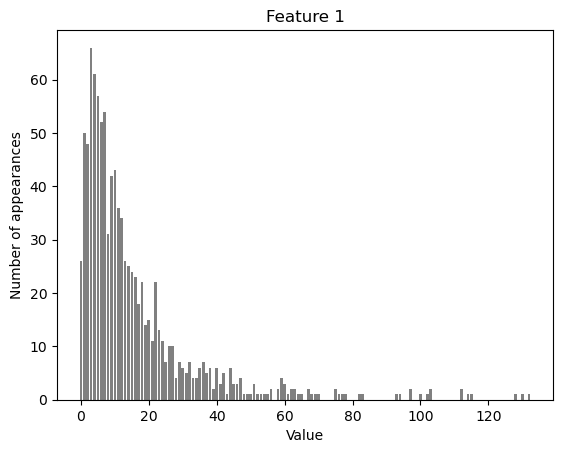

In [28]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.title("Feature 0")

Text(0.5, 1.0, 'Feature 1')

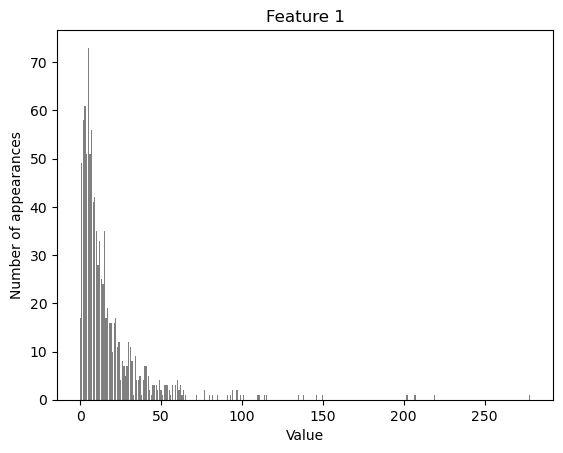

In [29]:
bins = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.title("Feature 1")

Text(0.5, 1.0, 'Feature 2')

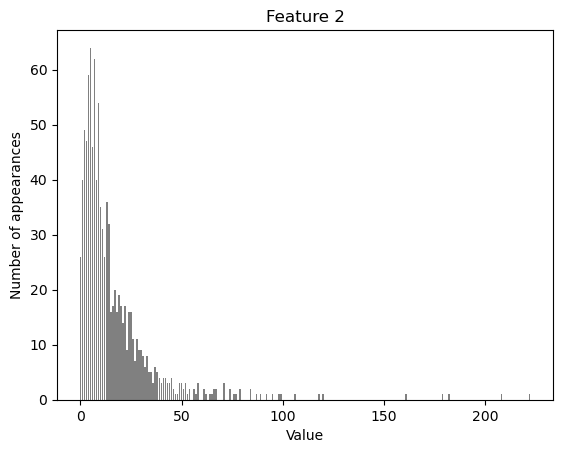

In [30]:
bins = np.bincount(X[:, 2])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.title("Feature 2")

In this case we can see that all three features have a similar skewed distribution that is very common in practice. This is a distribution that linear models can not handle well. Lets try and fit a ridge regression model to this data set and see what our accuracy is:

In [33]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))


Test score: 0.576


Ridge regression was not able to capture the relationship between the features and the ouput well. Now applying a logarithmic tranform of our features can help though. Since 0 appears in our features we can not use $log(x)$ but we can use $log(x+1)$. Lets define this transform on our training and testing sets and visualize the transformation:

In [34]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 1.0, 'Feature 0')

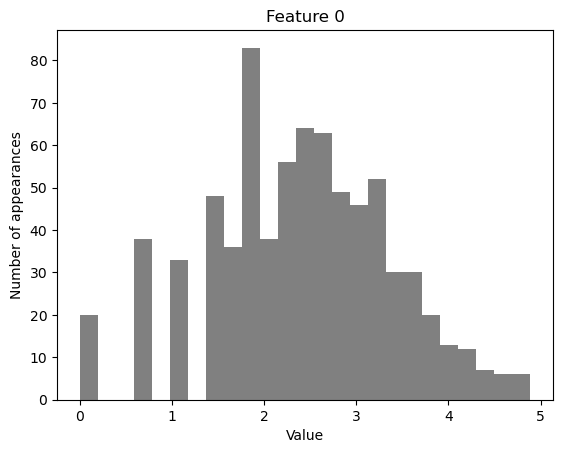

In [38]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.title("Feature 0")

Text(0.5, 1.0, 'Feature 1')

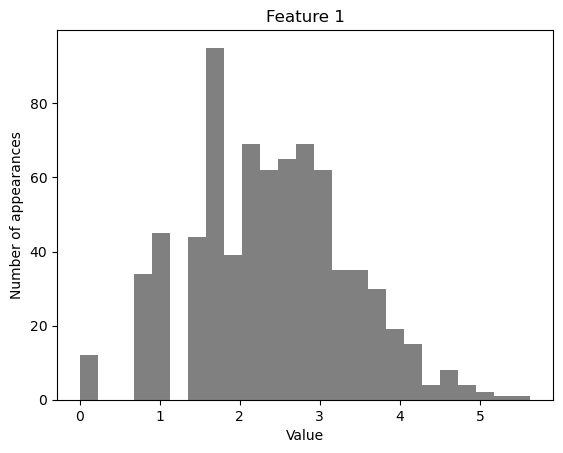

In [39]:
plt.hist(X_train_log[:, 1], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.title("Feature 1")

Text(0.5, 1.0, 'Feature 2')

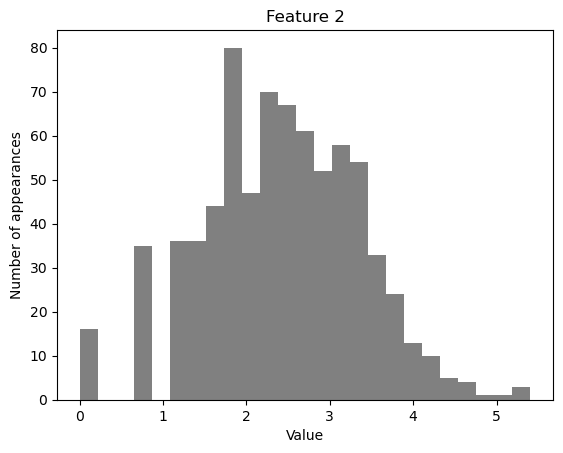

In [40]:
plt.hist(X_train_log[:, 2], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.title("Feature 2")

Now we can build a ridge regression model on this tranformed data and see how much better of a fit we can get:

In [48]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test) 
print("Test score (Ridge): {:.3f}".format(score))

from sklearn.tree import DecisionTreeRegressor
score_tree=DecisionTreeRegressor().fit(X_train, y_train).score(X_test, y_test) 
print("Test score (Decision Tree): {:.3f}".format(score_tree))

score_tree_log=DecisionTreeRegressor().fit(X_train_log, y_train).score(X_test_log, y_test) 
print("Test score Decision Tree with Transformation): {:.3f}".format(score_tree_log))

Test score (Ridge): 0.877
Test score (Decision Tree): 0.780
Test score Decision Tree with Transformation): 0.759


Bad pipe message: %s [b'!G\xef\xe3o', b'\x9cu^\xebg\xa0\x041`J\x1a\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00']
Bad pipe message: %s [b'\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004']
Bad pipe message: %s [b"\xcc\xb7*\x19\xf0^Si\xab'^\xbe3\xa8\xa9K\xc1&\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10"]
Bad pipe message: %s [b'}\xb6\xb62-\x1f=\xf7\x04\xec\x1f\xd6wu\x11\xa62L\x00\x00T\xc0r\xc0s\xc0t\xc0u\xc0v\xc0w\xc0x\xc0y\xc0z\xc0{\xc0|\xc0}\xc0~\xc0\x7f\xc0']
Bad pipe message: %s [b'P\x03~\x0f\xc3T:\xfd\x1c\x03\xf4\xfc\x8d\xba\xe3\xa9\x07\x1a\x00\x00T\xc0r\xc0s\xc0t\xc0u\xc0v\xc0w\xc0x\xc0y\xc0z\xc0{\xc0|\xc0}\xc0~\xc0\x7f\xc0\x80\xc0\x81\xc0\x82\xc0\x83\xc0\x84\xc0\x85\xc0\x86\xc0\x87\xc0\x88\xc0\x89\xc0\x8a\xc0\x8b\xc0\x8c\xc0\x8d\xc0\

It takes knowing your features and the model you are trying to develop to transformation of your data. 

# Feature Selection #

As we have seen there are many ways to create new features and it might be tempting to just create a model from an overload of features. This is not the best practice as it leads to more complex models that require more time to fit and increases the chances of over fitting. When new features are created, or you already have a high dimensional data set it is a good idea to reduce the number of featutres to the most important ones and discard the rest. This can lead to simpler models that generalize better. THe question then is how do you know wethere a feature is god? There are three basixc stratigies, univariate statistics, model-based selection, and iterative selection. We will discuss each of these methods in detail.

## Univariate statistics ##

Here we determine if there is a statistically signifigant relationship between each feature and the target prediction. In the case of classifiscation this is also known as analysis of variance. The key property of these statistical tests is that they are univariate meaning they consider eah feature indvidually. This doea lead to discarding features that can be highky informative but only when combined with other features. to run these test in scikit-learn we need to choose a statistical test either f_classif for classification or f_regression for regression and a method to discard features, usually the p=value. All methods use a threshold to discard all features higher than some cut-off p-value. These features are less likely to be related to the target. The methods for finding this threshold differ but the similest methods are SelectKBeast and SelectPercentile. SelectKBest selects a fixed numer k features and SelectPercentile selects a fixed percentage of features. To apply these methods and undrstand them better we are going to look at a breast cancer data set and intrduce some features with noise. The breast cancer data set contains features of the tumor and tries to determine if it is malignant or begnin. With feature selection we should be able to remove the features with noise.

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile 
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 30))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise 
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=12, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50) 
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_selected.shape: {}".format(X_train_selected.shape))


X_train.shape: (284, 60)
X_train_selected.shape: (284, 30)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

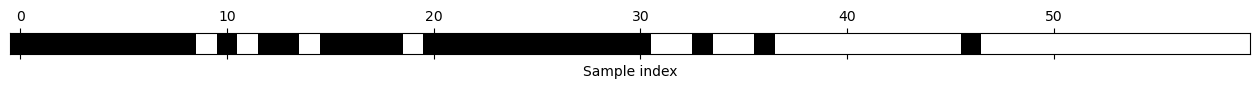

In [20]:
def nois_viz(feature_select):
    mask = feature_select.get_support()
    #print(mask)
    # visualize the mask -- black is True, white is False 
    plt.matshow(mask.reshape(1, -1), cmap='gray_r') 
    plt.xlabel("Sample index")
    plt.yticks(())
    return mask

nois_viz(select)

As we can see that most of the first 30 features are selected but some of the noise is selected. Lets compare the preforemance of logistic regression on thefull data set with noise with our reduced Dataset:

In [21]:
from sklearn.linear_model import LogisticRegression # transform test data
X_test_selected = select.transform(X_test)
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test))) 
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.937
Score with only selected features: 0.947


## Model Based Feature selection ##

We can also leverage supervised machine learning modles to jusge the importance of features. This model used to judge does not have to be the same as the model that you are trying to create. Th model just needs to provide a measure of feature importance. Decision trees and tree based methods provide a feature_importances attribute that directly encodes the importance of each feature. linear models have the coefficients whose absolute values can capture feature importance. Model based feature selection considers all featurs at once an therfore can capture interactions, as long as the model can do so. to use model-based feature selection we need to use the SelectFromModel transformer in Scikit-learn:

In [15]:
from sklearn.feature_selection import SelectFromModel 
from sklearn.ensemble import RandomForestClassifier 
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")

Here we have created a class that selects all features that have an importance over some threshold. We are using a random forest classifier and the median to make this comparable to our univariate test. Now lets transform and fir our model:

X_train.shape: (284, 60)
X_train_l1.shape: (284, 30)
Test score: 0.947


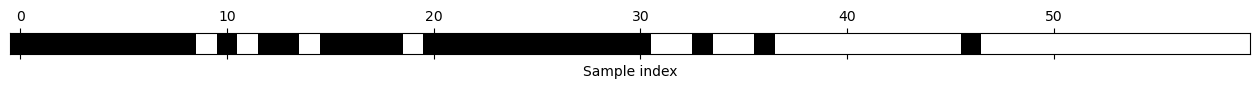

In [22]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l1.shape: {}".format(X_train_l1.shape))

nois_viz(select)

X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=1000000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

with better feature selection we can get better preformance

## Iterative Feature Selection ##



Test score: 0.940


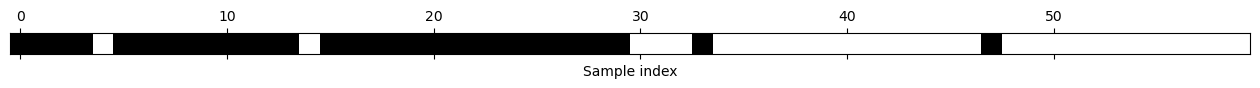

In [23]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=12),n_features_to_select=30)
select.fit(X_train, y_train)

nois_viz(select)

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression(max_iter=100000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test) 
print("Test score: {:.3f}".format(score))


In [24]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.940


Bad pipe message: %s [b'Hp5_\x9f\x11\x9f%>\x0cy)W\xc1\xb6\xcei[\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B\x00C\x00D\x00E\x00F\x00g\x00h\x00i\x00j\x00k\x00l\x00m\x00\x84\x00\x85\x00\x86\x00\x87\x00\x88\x00\x89\x00\x96\x00\x97\x00\x98\x00\x99\x00\x9a\x00\x9b\x00\x9c\x00\x9d\x00\x9e\x00\x9f\x00\xa0\x00\xa1\x00\xa2\x00\xa3\x00\xa4\x00\xa5\x00\xa6\x00\xa7\x00\xba\x00\xbb\x00\xbc\x00\xbd\x00\xbe']
Bad pipe message: %s [b's\x01fw\xe2X\xa0\x0f\x1bG\xc3\x08\x87 \x11\x10~\xb1\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x0

In [158]:
Xtrain_true,Xtest_true,ytrain,ytest=train_test_split(cancer.data, cancer.target, random_state=12, test_size=.5)
LogisticRegression(max_iter=100000).fit(Xtrain_true, ytrain).score(Xtest_true,y_test)

0.9368421052631579